# IFN Tutorial for Natural Language Processing

by [*Kardi Teknomo*](https://people.revoledu.com/kardi/)

In [13]:
import IdealFlow.Text as ift     # import package.module as alias

In [14]:
text = """Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence.
It is concerned with the interactions between computers and human language. It can't be true human language, but it is closed enough, right?

In particular, NLP is used to program computers to process and analyze large amounts of natural language data.
"""
text

"Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence.\nIt is concerned with the interactions between computers and human language. It can't be true human language, but it is closed enough, right?\n\nIn particular, NLP is used to program computers to process and analyze large amounts of natural language data.\n"

In [15]:
tp=ift.NLP("my_text")
tp.text=text
X,y=tp.prepareTextInput()
print('X:\n',X)
print('y:\n',y)
print('accuracy = ',tp.fit(X, y),'\n')
lut=tp.lut
print('\nlut=',lut)
tp.save()
print('network:\n',tp.IFNs)

sentences=""
for i in range(15):
    tr=tp.generate("my_text")
    sentence=tp.detokenize(tr)
    sentences=sentences+" "+ sentence
print(sentences,"\n")
search_text = "NLP is used"
print("query result:\n",tp.query(search_text))
print("query result:\n",tp.query("In particular"))
X="In particular, NLP is used to program"
print("predict result",tp.predict_text_category(X))

X:
 [['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'a', 'subfield', 'of', 'linguistics', ',', 'computer', 'science', ',', 'and', 'artificial', 'intelligence', '.'], ['It', 'is', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', 'language', '.'], ['It', "can't", 'be', 'true', 'human', 'language', ',', 'but', 'it', 'is', 'closed', 'enough', ',', 'right', '?'], ['In', 'particular', ',', 'NLP', 'is', 'used', 'to', 'program', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data', '.']]
y:
 ['my_text', 'my_text', 'my_text', 'my_text']
accuracy =  1.0 


lut= {'k1': 'Natural', 'az2': 'language', 'ci7': 'processing', 'aw9': '(', 'bd6': 'NLP', 'ca9': ')', 'ce3': 'is', 'ba3': 'a', 'cu9': 'subfield', 'bq9': 'of', 'cf4': 'linguistics', 'ck9': ',', 'r8': 'computer', 'ab8': 'science', 'aih18': 'and', 'p6': 'artificial', 'wr16': 'intelligence', 'av8': '.', 'zc79': 'It', 'x4': 'concerned', 'f': 'with', '

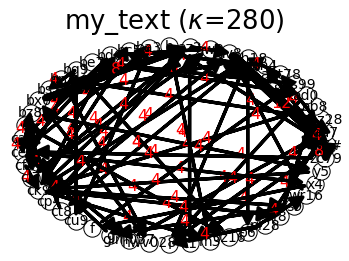

In [16]:
tp.show()

In [17]:
tp=ift.NLP("new_text")
tp.text=text

# Get paragraphs
paragraphs = tp.get_paragraphs()
print("Paragraphs:", paragraphs)

# Get sentences from the first paragraph
sentences = tp.get_sentences(paragraphs[0])
print("Sentences:", sentences)

# Tokenize the first sentence
tokens = tp.tokenize(sentences[0])
print("Tokens:", tokens)

# Remove stop words
filtered_tokens = tp.remove_stopwords(tokens)
print("Filtered Tokens:", filtered_tokens)

# Get bag of words
bow = tp.bag_of_words(filtered_tokens)
print("Bag of Words:", bow)

# Generate bigrams
bigrams = tp.ngrams(filtered_tokens, n=2)
print("Bigrams:", bigrams)

# Additional methods
avg_sentence_length = tp.average_sentence_length()
print("Average Sentence Length:", avg_sentence_length)

vocab_size = tp.vocabulary_size
print("Vocabulary Size:", vocab_size)


Paragraphs: ["Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence.\nIt is concerned with the interactions between computers and human language. It can't be true human language, but it is closed enough, right?", 'In particular, NLP is used to program computers to process and analyze large amounts of natural language data.']
Sentences: ['Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence.', 'It is concerned with the interactions between computers and human language.', "It can't be true human language, but it is closed enough, right?"]
Tokens: ['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'a', 'subfield', 'of', 'linguistics', ',', 'computer', 'science', ',', 'and', 'artificial', 'intelligence', '.']
Filtered Tokens: ['Natural', 'language', 'processing', '(', 'NLP', ')', 'subfield', 'linguistics', ',', 'computer', 'science', ',', 'artificial', 'intelligence', 

In [18]:
# start new object
tp=ift.NLP("entity and intent recognition")
text = "John Doe sent an email to jane.doe@example.com on January 5th."
entities = tp.entity_recognition(text)
print(entities)

# Predict intent and entities
input_text = "Book a flight to New York on September 21st at 5:00 PM"
recognition = tp.recognize(input_text)
print("Input Text:", input_text)
print("Predicted Intent:", recognition['intent'])
print("Identified Entities:", recognition['entities'])

# Test data for evaluation
test_data = [
{"text": "Book a flight to Paris", "intent": "book_flight"},
{"text": "What's the weather like today?", "intent": "weather_query"},
{"text": "Hi there!", "intent": "greeting"},
{"text": "Order a pizza for delivery", "intent": "order_food"}        
]

# Evaluate the model
metrics = tp.evaluate(test_data)
print("Evaluation Metrics:", metrics)

sentence = "John reads books."
parsed = tp.parse_sentence(sentence)
print("Parsed Sentence:", parsed)

# Add a new intent
tp.add_intent('schedule_meeting', ['schedule', 'meeting', 'appointment'])

# Add a new entity pattern
tp.add_entity_pattern('Email', r'\b[\w.-]+@[\w.-]+\.\w{2,4}\b', "Matches email addresses")

# Update model with new training data
new_data = [
{"text": "Schedule a meeting with Alice", "intent": "schedule_meeting"},
{"text": "I have an appointment at 3 PM", "intent": "schedule_meeting"}
]
tp.update_model(new_data)

# Save patterns    
tp.save_intent()

# Predict intent and entities
input_text = "Schedule a meeting with Bob on October 10th"
recognition = tp.recognize(input_text)
print("Input Text:", input_text)
print("Predicted Intent:", recognition['intent'])
print("Identified Entities:", recognition['entities'])

# Parse a sentence
parsed = tp.parse_sentence("Alice sends an email.")
print("Parsed Sentence:", parsed)

[{'entity': 'example.com', 'type': 'URL'}, {'entity': 'a', 'type': 'EmotionEmoji'}, {'entity': 'i', 'type': 'EmotionEmoji'}, {'entity': '5th', 'type': 'OrdinalNumber'}, {'entity': 's', 'type': 'EmotionEmoji'}, {'entity': 'John', 'type': 'FirstName'}, {'entity': 'jane.doe', 'type': 'DockerImageTag'}, {'entity': 'n', 'type': 'EmotionEmoji'}, {'entity': 'j', 'type': 'EmotionEmoji'}, {'entity': 'r', 'type': 'EmotionEmoji'}, {'entity': '5th', 'type': 'DockerImageTag'}, {'entity': 'd', 'type': 'EmotionEmoji'}, {'entity': 'J', 'type': 'EmotionEmoji'}, {'entity': 'e', 'type': 'EmotionEmoji'}, {'entity': 'l', 'type': 'EmotionEmoji'}, {'entity': 'y', 'type': 'EmotionEmoji'}, {'entity': 'on', 'type': 'DockerImageTag'}, {'entity': 'm', 'type': 'EmotionEmoji'}, {'entity': 'jane.doe', 'type': 'URL'}, {'entity': 'o', 'type': 'EmotionEmoji'}, {'entity': 'u', 'type': 'EmotionEmoji'}, {'entity': 'John Doe', 'type': 'Location'}, {'entity': 'John Doe', 'type': 'Person'}, {'entity': 'jane.doe@example.com',